### https://www.kaggle.com/parulpandey/wuhan-coronavirus-a-geographical-analysis/notebook

### data from kaggle

In [1]:
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [33]:
data= pd.read_csv("Coronavirus_data.csv",)
data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [34]:
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)

In [35]:
#data.set_index('Last Update', inplace=True)
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [36]:
countries = data['Country'].unique().tolist()
print(countries)

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']


In [37]:
print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  27


In [38]:
from datetime import date
data_30 = data[data['Last Update'] > pd.Timestamp(date(2020,1,30))]

data_30.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


In [39]:
cases = pd.DataFrame(data_30.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,28)

ValueError: Length mismatch: Expected axis has 23 elements, new values have 27 elements

In [40]:
global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country,Confirmed
Country,,
Australia,Australia,9.0
Cambodia,Cambodia,1.0
Canada,Canada,3.0
Finland,Finland,1.0
France,France,5.0
Germany,Germany,4.0
Hong Kong,Hong Kong,12.0
India,India,1.0
Italy,Italy,2.0


In [41]:
# Make a data frame with dots to show on the map
world_data = pd.DataFrame({
   'name':list(global_cases['Country']),
    'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(global_cases['Confirmed']),
})

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map
#world_map.save('countries_affected.html')

In [42]:
print('Globally Confirmed Cases: ',data_30['Confirmed'].sum())
print('Global Deaths: ',data_30['Deaths'].sum())
print('Globally Recovered Cases: ',data_30['Recovered'].sum())

Globally Confirmed Cases:  9776.0
Global Deaths:  213.0
Globally Recovered Cases:  187.0


In [43]:
data_30.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country        Province/State                                
Australia      New South Wales         4.0     0.0        2.0
               Queensland              3.0     0.0        0.0
               Victoria                2.0     0.0        0.0
Canada         British Columbia        1.0     0.0        0.0
               Ontario                 2.0     0.0        0.0
Germany        Bavaria                 4.0     0.0        0.0
Hong Kong      Hong Kong              12.0     0.0        0.0
Macau          Macau                   7.0     0.0        0.0
Mainland China Anhui                 237.0     0.0        3.0
               Beijing               121.0     1.0        5.0
               Chongqing             206.0     0.0        1.0
               Fujian                101.0     0.0        0.0
               Gansu                  29.0     0.0        0.0
               Guangdong             393.0     0.0       11.0
               Guangxi                87.0     0.0        2.0
               Guizhou                15.0     0.0        1.0
               Hainan                 50.0     1.0        1.0
               Hebei                  82.0     1.0        0.0
               Heilongjiang           59.0     2.0        0.0
               Henan                 352.0     2.0        3.0
               Hubei                5806.0   204.0      116.0
               Hunan                 332.0     0.0        2.0
               Inner Mongolia         20.0     0.0        0.0
               Jiangsu               168.0     0.0        2.0
               Jiangxi               240.0     0.0        7.0
               Jilin                  14.0     0.0        1.0
               Liaoning               45.0     0.0        1.0
               Ningxia                21.0     0.0        1.0
               Qinghai                 8.0     0.0        0.0
               Shaanxi                87.0     0.0        0.0
               Shandong              178.0     0.0        2.0
               Shanghai              128.0     1.0        9.0
               Shanxi                 39.0     0.0        1.0
               Sichuan               177.0     1.0        1.0
               Tianjin                32.0     0.0        0.0
               Tibet                   1.0     0.0        0.0
               Xinjiang               17.0     0.0        0.0
               Yunnan                 76.0     0.0        0.0
               Zhejiang              537.0     0.0        9.0
Taiwan         Taiwan                  9.0     0.0        0.0
US             Arizona                 1.0     0.0        0.0
               California              2.0     0.0        0.0
               Illinois                2.0     0.0        0.0
               Washington              1.0     0.0        0.0

In [44]:
data_30.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    213.0
Macau               0.0
Cambodia            0.0
Canada              0.0
Finland             0.0
Name: Deaths, dtype: float64

In [45]:
data_30.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
Mainland China    179.0
Thailand            5.0
Australia           2.0
Japan               1.0
Taiwan              0.0
Name: Recovered, dtype: float64

In [46]:
China = data_30[data_30['Country']=='Mainland China']
China

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0
380,Jiangxi,Mainland China,2020-01-30 21:30:00,240.0,0.0,7.0
381,Anhui,Mainland China,2020-01-30 21:30:00,237.0,0.0,3.0
382,Chongqing,Mainland China,2020-01-30 21:30:00,206.0,0.0,1.0
383,Shandong,Mainland China,2020-01-30 21:30:00,178.0,0.0,2.0
384,Sichuan,Mainland China,2020-01-30 21:30:00,177.0,1.0,1.0


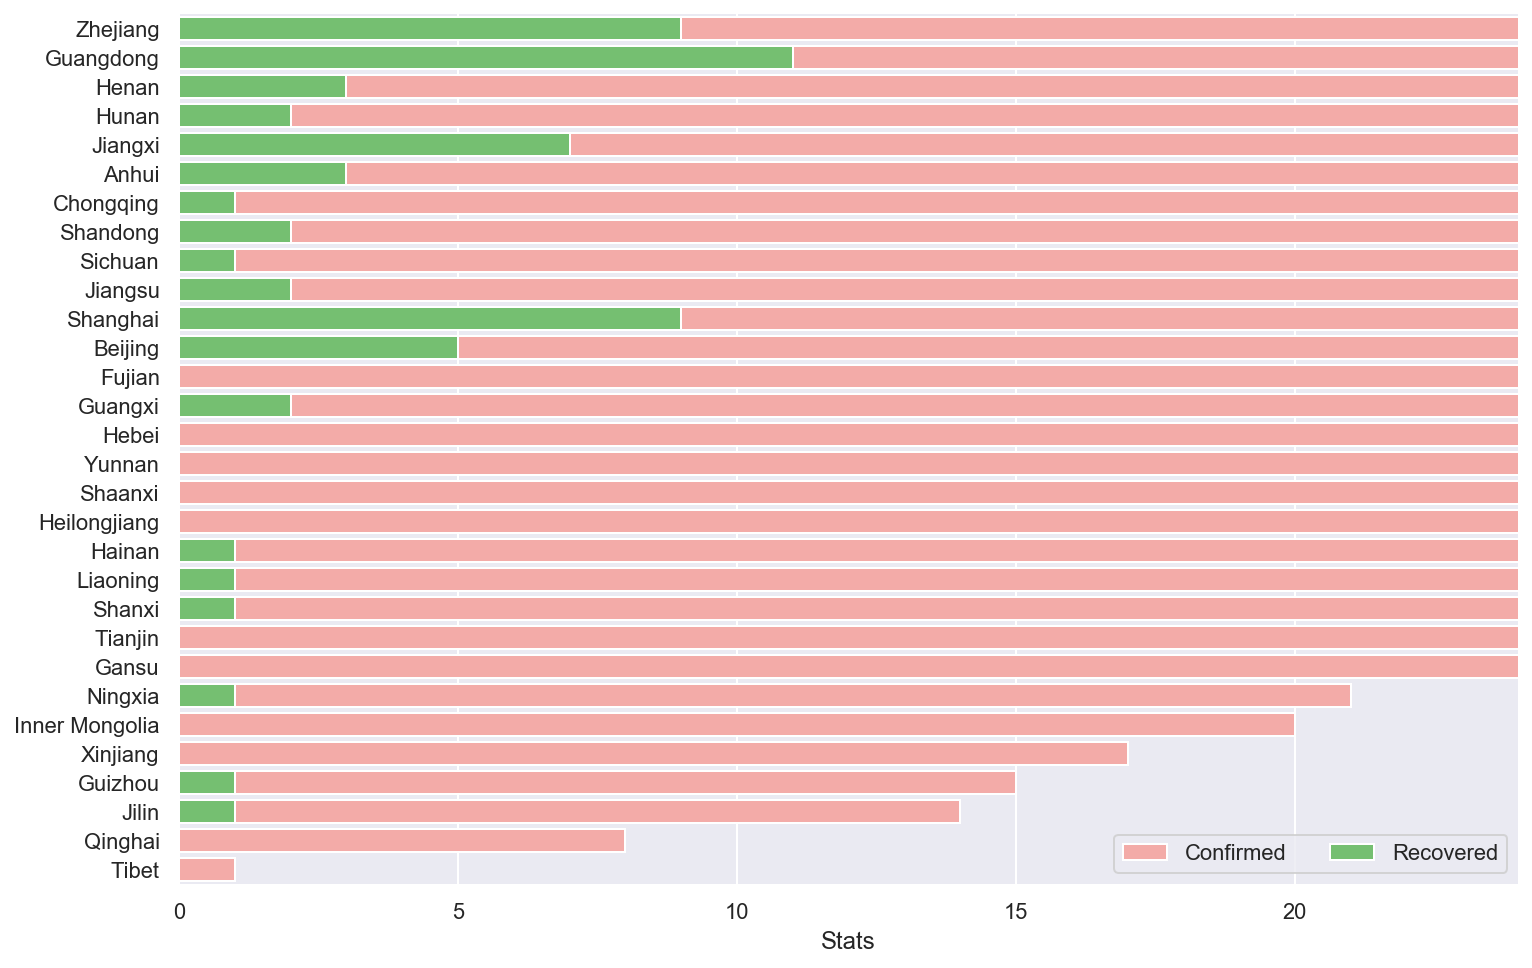

In [47]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

In [48]:
latitude = 39.91666667
longitude = 116.383333
 
# create map and display it
china_map = folium.Map(location=[latitude, longitude], zoom_start=12)

china_coordinates= pd.read_csv("../input/china-states-coordinates/China_states_coordinates.csv")
china_coordinates.rename(columns={'States':'Province/State'},inplace=True)
df_china_virus = China.merge(china_coordinates)

# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'name':list(df_china_virus['Province/State']),
   'lat':list(df_china_virus['Latitude']),
   'lon':list(df_china_virus['Longitude']),
   'Confirmed':list(df_china_virus['Confirmed']),
   'Recovered':list(df_china_virus['Recovered']),
   'Deaths':list(df_china_virus['Deaths'])
})

data.head()

FileNotFoundError: [Errno 2] File b'../input/china-states-coordinates/China_states_coordinates.csv' does not exist: b'../input/china-states-coordinates/China_states_coordinates.csv'

In [49]:
china_map1 = folium.Map(location=[latitude, longitude], zoom_start=4,tiles='Stamen Toner')

for lat, lon, value, name in zip(data['lat'], data['lon'], data['Confirmed'], data['name']):
    folium.CircleMarker([lat, lon],
                        radius=13,
                        popup = ('Province: ' + str(name).capitalize() + '<br>'
                        'Confirmed: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(china_map1)
    folium.Map(titles='jj', attr="attribution")    
china_map1

KeyError: 'lat'